In [1]:
import pandas as pd
import numpy as np

# 0. Data Wrangling

Google Trends allows the interest *per day* iff the requested timeframe is of length of max 1 year. 

Therefore, we're going to do one request for each year for each keyword, from 2004 until 2020, and merge all the datasets using the external API `pytrends`.

Installation : `pip install pytrends`

We import the data from google trends and S&P500 stock markets. Both data are imported the same day

In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', timeout=(20,60), tz=360)

In [3]:
## Helper functions

def add_year(date):
    if is_leap_year(date.year):
        delta = datetime.timedelta(days=366)
    else:
        delta = datetime.timedelta(days=365)
    return date + delta

def is_leap_year(year):
    if (year % 4) == 0:
        if (year % 100) == 0:
            if (year % 400) == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

In [4]:
import requests
import time
import datetime
import pandas as pd

'''
Download and save as csv the Google US Trends, interests by week, for 1 selected keyword for the period of 2004-today
'''
def dl_interest_for_keyword(keyword):
    kw_list = [keyword] # List of keywords. We're using only 1 for each method execution
    dataframes = []     # List of df for each year
    start = datetime.datetime(2004,1,1) 
    current_year = start

    # Make a request for each year
    for i in range(2020-2004+1):
        timeframe = str(current_year.year)+'-01-01 ' + str(current_year.year) + '-12-31'
        try:
            pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='US', gprop='')
            print('Downloading ' + str(current_year.year) + ' data...',end='')
            df = pytrends.interest_over_time()
            print('OK')
            dataframes.append(df)
            time.sleep(1) # Sleep to avoid 429, may or may not be necessary
            current_year=add_year(current_year)
        except requests.exceptions.Timeout:
            print('TIMEOUT')

    # Merge the datasets of all years
    df_merged = pd.concat(dataframes)
    df_merged.drop('isPartial',inplace=True,axis=1)

    # Save to a .csv named as the keyword 
    df_merged.to_csv(keyword +'.csv', header='interest', index_label='date')
    print('Saved as `' + keyword +'.csv'+'`')

In [5]:
dl_interest_for_keyword('stocks to buy')

Saved as `stocks to buy.csv`


# 0.1 Importing Google Trends Data

interesting keywords for Google trends:
- debt
- stocks
- inflation
- portfolio
- housing

- revenues
- employment
- unemployment
- leverage
- credit

- return
- bonds
- economics
- religion
- money

- profit
- investment
- gains
- cancer
- marriage

- buy
- hold
- headlines
- present
- crisis

- society
- gross
- loss
- hedge
- nasdaq

- cash
- short sell
- greed
- gain
- happy

- financial markets
- finance
- house
- water
- rich

- risk
- oil
- opportunity
- golf
- invest

- success
- economy
- food
- war
- consume

- nyse
- movie
- health
- consumption
- transaction

- environment
- fond

- spdr
- buy spdr

Adding companies that belong to S&P500 (https://fknol.com/list/market-cap-sp-500-index-companies.php)

- apple
- microsoft
- amazon

- alphabet
- google
- facebook
- berkshire
- visa

- walmart
- johnson
- j p morgan
- procter and gamble
- mastercard

- nvidia
- united health
- home depot
- walt disney
- verizon communications

- paypal
- bank of america
- comcast
- adobe
- coca cola

- pfizer
- netflix
- nike
- intel
- at&t

- merck
- salesforce
- pepsico
- abbott labs
- cisco

- oracle
- mcdonalds
- medtronic


In [6]:
import glob

all_files = glob.glob("data/Keywords_US_Weekly/*")

dfs = []

for filename in all_files:
    df =  pd.read_csv(filename,index_col='date')
    dfs.append(df)
    
df = pd.concat(dfs, axis=1)

In [7]:
df.head()

,abbott labs,adobe,alphabet,amazon,apple,at&t,berkshire,bonds,buy,cancer,...,spdr,stocks,success,transaction,unemployment,united health,verizon communications,visa,war,water
date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,29,92,79,53,67,90,55,81,67,75,...,52,89,85,100,98,81,0,60,64,75
2004-01-11,24,87,85,51,69,89,28,81,66,74,...,74,97,70,70,98,100,20,55,65,76
2004-01-18,32,100,77,54,63,96,48,77,64,71,...,32,100,85,73,96,80,40,44,65,77
2004-01-25,68,93,84,51,61,81,31,72,63,82,...,0,93,76,91,100,83,19,48,62,80
2004-02-01,93,95,84,50,59,88,30,75,59,71,...,21,77,84,50,85,65,19,50,64,73


- Compute percentage change in a cell in comparison to previous month according to [Quantifying Trading Behavior in Financial Markets Using Google Trends](https://www.nature.com/articles/srep01684).
- Set first week to zero
- **TODO** Handle inf values. Replace them by the max value of the dataset ? 

In [8]:
df = df.pct_change(periods=1) # Computes the percentage change from the previous row. Applies to *all* rows
df.iloc[0,:]=0
df

,abbott labs,adobe,alphabet,amazon,apple,at&t,berkshire,bonds,buy,cancer,...,spdr,stocks,success,transaction,unemployment,united health,verizon communications,visa,war,water
date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-11,-0.172414,-0.054348,0.075949,-0.037736,0.029851,-0.011111,-0.490909,0.000000,-0.014925,-0.013333,...,0.423077,0.089888,-0.176471,-0.300000,0.000000,0.234568,inf,-0.083333,0.015625,0.013333
2004-01-18,0.333333,0.149425,-0.094118,0.058824,-0.086957,0.078652,0.714286,-0.049383,-0.030303,-0.040541,...,-0.567568,0.030928,0.214286,0.042857,-0.020408,-0.200000,1.000000,-0.200000,0.000000,0.013158
2004-01-25,1.125000,-0.070000,0.090909,-0.055556,-0.031746,-0.156250,-0.354167,-0.064935,-0.015625,0.154930,...,-1.000000,-0.070000,-0.105882,0.246575,0.041667,0.037500,-0.525000,0.090909,-0.046154,0.038961
2004-02-01,0.367647,0.021505,0.000000,-0.019608,-0.032787,0.086420,-0.032258,0.041667,-0.063492,-0.134146,...,inf,-0.172043,0.105263,-0.450549,-0.150000,-0.216867,0.000000,0.041667,0.032258,-0.087500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,0.000000,0.232143,0.283019,0.283333,0.258621,0.189189,0.229167,0.208955,0.720930,0.290323,...,0.310345,0.444444,0.206349,0.205882,0.227273,0.246377,1.090909,0.134615,0.780000,0.161290
2020-11-15,0.400000,0.028986,-0.029412,0.064935,0.013699,0.011364,0.033898,0.123457,-0.081081,-0.025000,...,-0.157895,0.000000,0.039474,0.048780,0.000000,0.046512,-0.275362,0.000000,0.123596,0.013889
2020-11-22,-0.571429,-0.197183,-0.242424,0.158537,0.351351,0.022472,-0.065574,-0.340659,0.470588,-0.153846,...,-0.250000,0.051282,-0.253165,-0.174419,-0.074074,-0.322222,0.380000,-0.016949,-0.210000,-0.068493


# 0.2 Importing S&P500 data

In [9]:
stocks = pd.read_csv('data/sp500_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%d/%m/%Y')
stocks=stocks.set_index('Date')
stocks = stocks.iloc[1:,:]

# 0.3 Visualization

Let's plot the autocorrelation function to see with which lag values our prices are correlated.

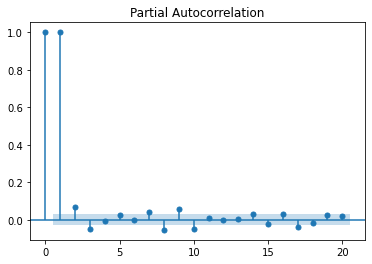

In [10]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf


plot_pacf(stocks['Adj Close'], lags=20)
pyplot.show()

We can see that the PACF becomes almost silent after lag(1). This means that an AR model is best in our situation in comparison with MA model. See [PSU Stat510: PACF](https://online.stat.psu.edu/stat510/lesson/2/2.2)

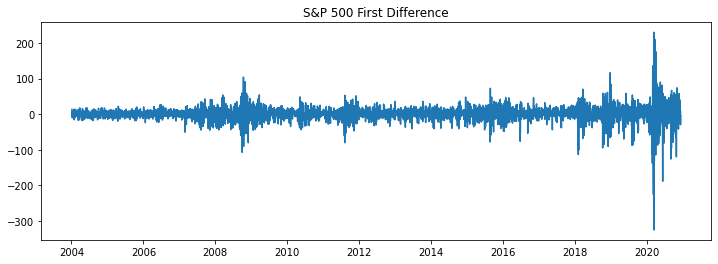

In [12]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 4))
plt.plot((stocks['Adj Close']-stocks['Adj Close'].shift())[1:])
plt.title('S&P 500 First Difference')
plt.show()

In 2008, 2009 and in February/March 2020 which correspond to stock market crashes, we observe an exponential behaviour. To avoid that these periods overinfluence our models due to their high variance, we're going to apply the natural logarithm function to our values. 

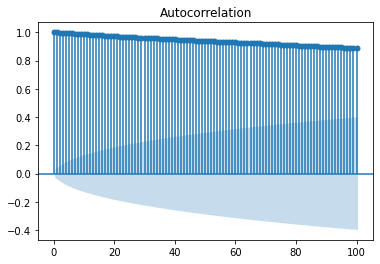

In [13]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

series = stocks['Adj Close']
plot_acf(series, lags=100)
plt.show()

The ACF is decreasing linearly with the number of lags. 

https://dspace.mit.edu/bitstream/handle/1721.1/55206/609415506-MIT.pdf?sequence=2&isAllowed=y

#### Seasonality

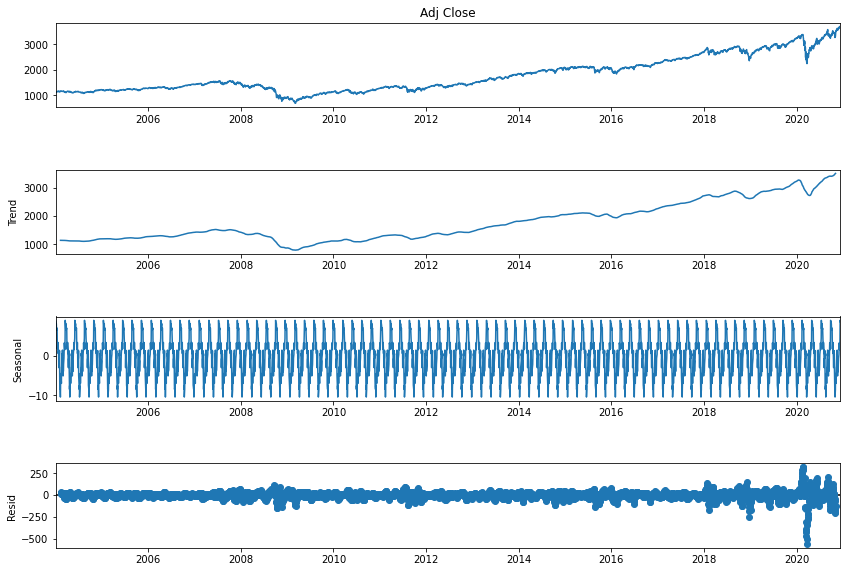

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(stocks['Adj Close'], model='additive', period=52)  
#plt.figure(figsize=(12, 10))
fig = sd.plot()
fig.set_size_inches(13,9)
plt.show()

There doesn't seem to be any significant yearly or weekly seasonality. Let's check the monthly seasonality. 

In [15]:
stocks['m'] = stocks.index.month

<AxesSubplot:xlabel='m'>

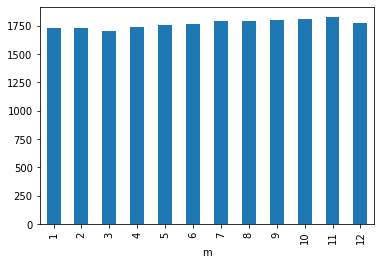

In [16]:
stocks.groupby('m')['Adj Close'].mean().plot.bar()

There is a weak monthly seasonality. 

# 0.4 Preprocessing

#### Applying logn

In [17]:
import math 
stocks['Log Adj Close'] = list(map(lambda x: math.log1p(x), stocks['Adj Close'].values))

<AxesSubplot:xlabel='Date'>

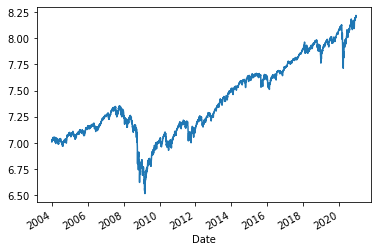

In [18]:
stocks['Log Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

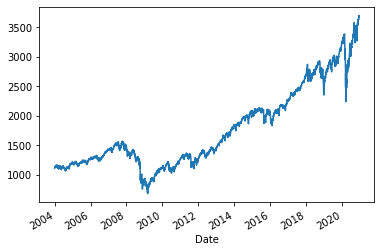

In [19]:
stocks['Adj Close'].plot()

#### Resampling

The closing stock price is generally considered as an accurate market signal. (See [Closing Price](https://www.investopedia.com/terms/c/closingprice.asp)). Thereafter we'll only consider the Adjusted Closing value of each trading week.

In [20]:
keep_last = lambda x: x.tail(1)

In [21]:
stocks_wfri = stocks.resample('W-FRI').apply(keep_last)
stocks_wfri.head()

,Open,High,Low,Close,Adj Close,Volume,m,Log Adj Close
Date,,,,,,,,
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000,1,7.011647
2004-01-09,1131.920044,1131.920044,1120.900024,1121.859985,1121.859985,1720700000,1,7.023634
2004-01-16,1132.050049,1139.829956,1132.050049,1139.829956,1139.829956,1721100000,1,7.039511
2004-01-23,1143.939941,1150.310059,1136.849976,1141.550049,1141.550049,1561200000,1,7.041018
2004-01-30,1134.109985,1134.170044,1127.729980,1131.130005,1131.130005,1635000000,1,7.031856


The closing stock price is considered as an accurate market signal. (See [Closing Price](https://www.investopedia.com/terms/c/closingprice.asp)). Thereafter we're considering only the Adjusted Closing value of each trading week.

# Prediction

For the prediction part, we have to split our data in two parts, one for training and one for testing.  
We decided the testing data to start the 1st January 2020. 

In [49]:
training_period = stocks_wfri.index <= pd.Timestamp(2020, 1, 1)
testing_period = stocks_wfri.index > pd.Timestamp(2020, 1, 1)
train = stocks_wfri[training_period]['Log Adj Close']
test = stocks_wfri[testing_period]['Log Adj Close']

## Best AR Model

For this part, `pmdarima` is needed. It is equivalent to R's auto.arima functionality. 

Installation :  
`pip install pmdarima`

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-3938.597, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-3940.338, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-3939.424, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-3944.113, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-3942.325, Time=0.43 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-3941.859, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-3940.631, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-3941.000, Time=0.77 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-3941.959, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-3940.120, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-3940.103, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-3937.924, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-3937.673, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-3942.071, Time=0.98 sec
 

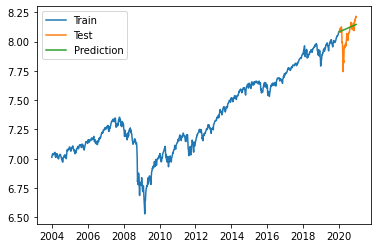

In [54]:
from pmdarima import auto_arima
arima = auto_arima(train, max_d=4, max_p=6, max_q=6, max_Q=2, trace=True, stepwise=False)
arima.fit(train)
predictions = model.predict(n_periods=test.shape[0])
predictions = pd.DataFrame(data=predictions,index = test.index)

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

## Trends

To determine which trends are the best predictors, we're going to test them individually and observe in which extent they improve our out-of-sample predictions. 